In [1]:
#Import useful functions
import warnings
warnings.filterwarnings("ignore")
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm
from sklearn.utils.multiclass import unique_labels
import itertools
from scipy import misc
import math
import os
import glob
import xlrd
import xlwt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from PIL import Image
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import pylab as plt
import numpy as np
from scipy.signal import argrelextrema
from IPython.display import Image
import matplotlib.patches as patches
import matplotlib as matplotlib
import xlsxwriter
from xlrd import open_workbook
from xlutils.copy import copy
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from datetime import datetime
plt.style.use('fivethirtyeight')
import itertools
from fbprophet import Prophet
from scipy.interpolate import interp1d
from sklearn.preprocessing import StandardScaler
import xlrd

In [2]:
 foldername1 = '/Users/JoyThompson/Desktop/CK Budget Structure Analysis.xlsx'

In [3]:
data = pd.read_excel(foldername1, sheetname='Sheet1')
rates = pd.read_excel(foldername1, sheetname='Sheet2')
print(data)

               Client Name 2018-01-01 2018-02-01 2018-03-01 2018-04-01  \
0               3B Medical  Need Data  Need Data  Need Data  Need Data   
1        David's Wholesale    5264.28    4574.24    5930.04    4658.28   
2                     Mavi    9347.27    6086.35    27956.7    40065.9   
3           Little Giraffe     118599    92173.5     105626    98099.5   
4   Handy Living (Domesis)  Need Data  Need Data  Need Data  Need Data   
5                 Westmoor       6696     2898.5     3754.5    4144.91   
6                  Jax Wax    7339.95    8574.34      12335      16267   
7      Package Service Co.      79.92      262.7    1687.54    1961.82   
8             Dammit Dolls    71493.4    68201.5    63420.7      66205   
9             Pet 'N Shape  Need Data  Need Data  Need Data  Need Data   
10         Wine Enthusiast     239444     249231     236812     222945   

   2018-05-01 2018-06-01 2018-07-01 2018-08-01 2018-09-01  ... 2020-03-01  \
0   Need Data      24651      4158

In [4]:
datesall=['2018-01-01','2018-02-01','2018-03-01','2018-04-01','2018-05-01','2018-06-01','2018-07-01','2018-08-01',
         '2018-09-01','2018-10-01','2018-11-01','2018-12-01','2019-01-01','2019-02-01','2019-03-01','2019-04-01',
         '2019-05-01','2019-06-01','2019-07-01','2019-08-01','2019-09-01','2019-10-01','2019-11-01','2019-12-01',
         '2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01',
         '2020-08-01','2020-09-01','2020-10-01','2020-11-01','2020-12-01']
collist=[]
for col in datesall:
        date=pd.to_datetime(col)
        collist.append(date)
datesin=collist[0:23]  
datesfc=collist[23:36]

In [5]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [6]:
from sklearn.utils import resample
def regressforecast(forecastin, nonan, countzero):

    forecastin=forecastin.set_index('ds')

    print(forecastin)
    if nonan!=550:
        fsam=forecastin.resample('MS')
        
        forecastfill=fsam.interpolate(method='pad')
   

        for fci in forecastin.index:
            y1val=forecastfill.loc[fci, 'y']
           

            if ~np.isnan(y1val):
                ynew=np.mean([ y1val])
                if ynew<0:
                    ynew=0
                forecastin.loc[fci, 'y']=ynew


    return forecastin

                    y
ds                   
2018-06-01   24651.00
2018-07-01   41583.00
2018-08-01  140685.00
2018-09-01  128493.34
2018-10-01  131914.98
2018-11-01  220086.07
2018-12-01  225939.41
2019-01-01  381587.48
2019-02-01    8317.29
2019-03-01   41558.87
2019-04-01  162014.18
2019-05-01  328539.65
2019-06-01  327052.18
2019-07-01  387098.59
2019-08-01  290583.28
2019-09-01  298587.11
2019-10-01  412689.82
2019-11-01  516358.91
                   y
ds                  
2018-06-01 -1.376277
2018-07-01 -1.260533
2018-08-01 -0.583095
2018-09-01 -0.666434
2018-10-01 -0.643045
2018-11-01 -0.040328
2018-12-01 -0.000316
2019-01-01  1.063659
2019-02-01 -1.487930
2019-03-01 -1.260698
2019-04-01 -0.437294
2019-05-01  0.701036
2019-06-01  0.690868
2019-07-01  1.101332
2019-08-01  0.441575
2019-09-01  0.496287
2019-10-01  1.276267
2019-11-01  1.984925


C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



13
                     y
ds                    
2018-01-01     5264.28
2018-02-01     4574.24
2018-03-01     5930.04
2018-04-01     4658.28
2018-05-01    10238.12
2018-06-01    78895.57
2018-07-01   292565.85
2018-08-01   327651.87
2018-09-01    58185.09
2018-10-01    82225.85
2018-11-01   137355.18
2018-12-01   153931.75
2019-01-01   117493.83
2019-02-01   122900.60
2019-03-01   150450.24
2019-04-01   160318.29
2019-05-01   194496.36
2019-06-01   307459.93
2019-07-01  1249853.80
2019-08-01   606437.61
2019-09-01   208502.03
2019-10-01   203748.55
2019-11-01   416435.04
                   y
ds                  
2018-01-01 -0.786171
2018-02-01 -0.788782
2018-03-01 -0.783652
2018-04-01 -0.788464
2018-05-01 -0.767350
2018-06-01 -0.507549
2018-07-01  0.300985
2018-08-01  0.433751
2018-09-01 -0.585918
2018-10-01 -0.494947
2018-11-01 -0.286336
2018-12-01 -0.223610
2019-01-01 -0.361492
2019-02-01 -0.341032
2019-03-01 -0.236784
2019-04-01 -0.199443
2019-05-01 -0.070112
2019-06-01  0.357344
20

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



13
                    y
ds                   
2019-07-01  131250.00
2019-08-01   93161.41
2019-09-01  101260.00
2019-10-01  172640.00
2019-11-01  210377.00
                   y
ds                  
2019-07-01 -0.237203
2019-08-01 -1.098662
2019-09-01 -0.915494
2019-10-01  0.698926
2019-11-01  1.552433


C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyThompson\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



13
                    y
ds                   
2018-01-01  239443.90
2018-02-01  249230.68
2018-03-01  236811.85
2018-04-01  222944.75
2018-05-01  237711.34
2018-06-01  300598.07
2018-07-01  335639.11
2018-08-01  298215.40
2018-09-01  237495.57
2018-10-01  303496.41
2018-11-01  538228.39
2018-12-01  942769.82
2019-01-01  349951.97
2019-02-01  266459.84
2019-03-01  288628.41
2019-04-01  289377.23
2019-05-01  341405.22
2019-06-01  363238.95
2019-07-01  385606.80
2019-08-01  221740.58
2019-09-01  266254.07
2019-10-01  371418.53
2019-11-01  487718.34
                   y
ds                  
2018-01-01 -0.651562
2018-02-01 -0.586872
2018-03-01 -0.668960
2018-04-01 -0.760621
2018-05-01 -0.663014
2018-06-01 -0.247336
2018-07-01 -0.015716
2018-08-01 -0.263085
2018-09-01 -0.664440
2018-10-01 -0.228178
2018-11-01  1.323390
2018-12-01  3.997389
2019-01-01  0.078891
2019-02-01 -0.472988
2019-03-01 -0.326455
2019-04-01 -0.321505
2019-05-01  0.022398
2019-06-01  0.166718
2019-07-01  0.314568
2019-0

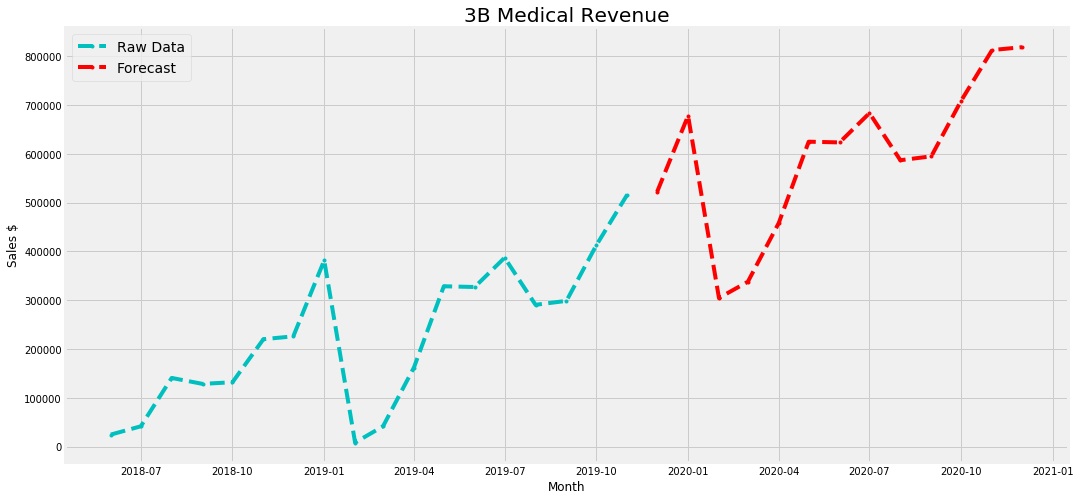

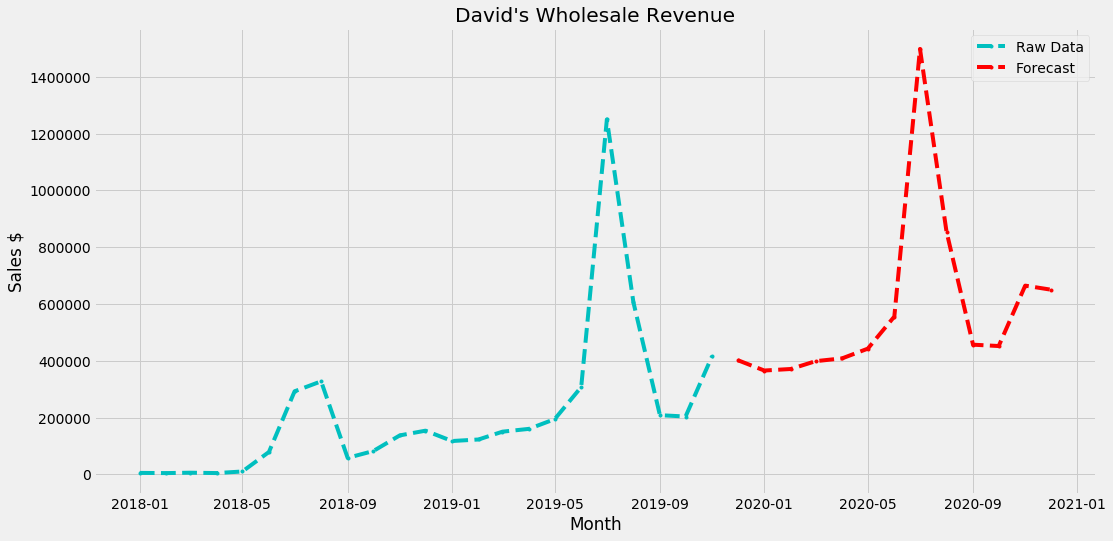

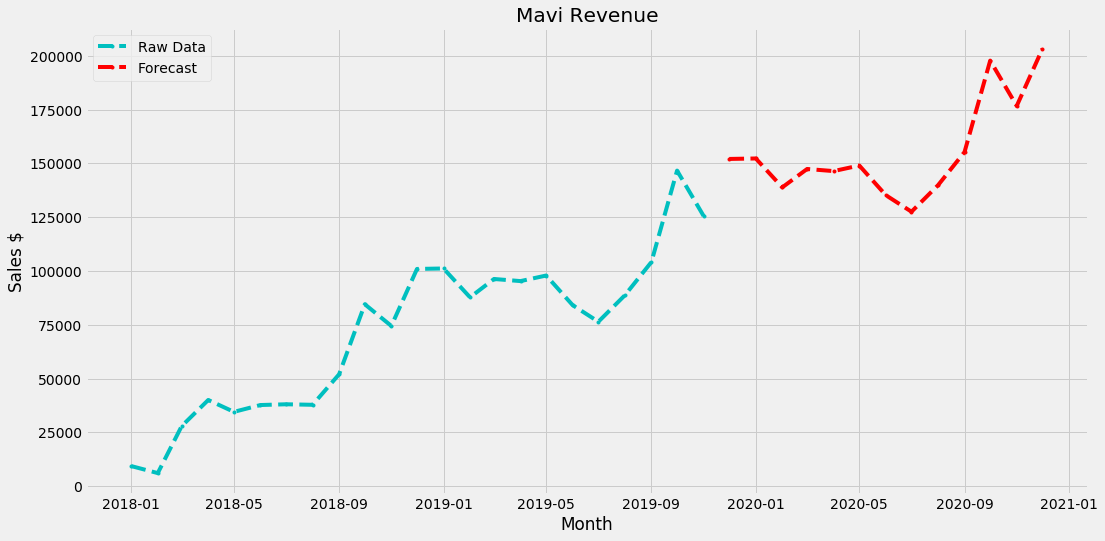

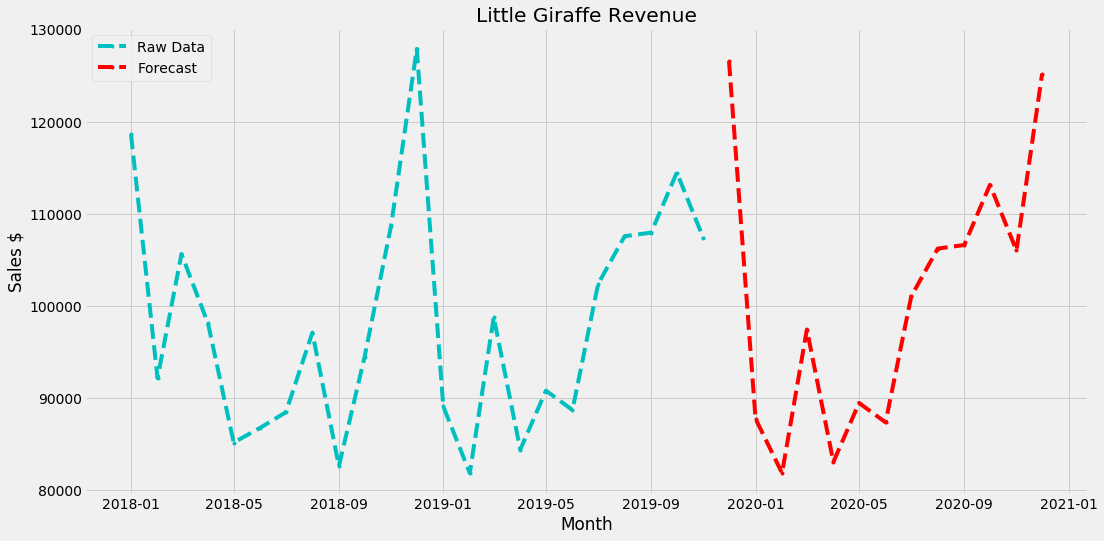

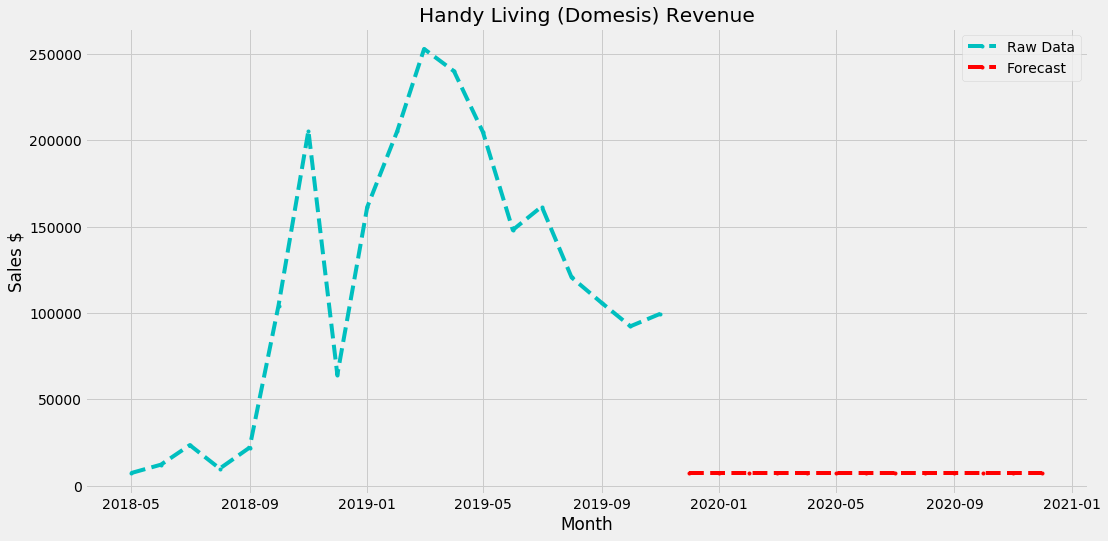

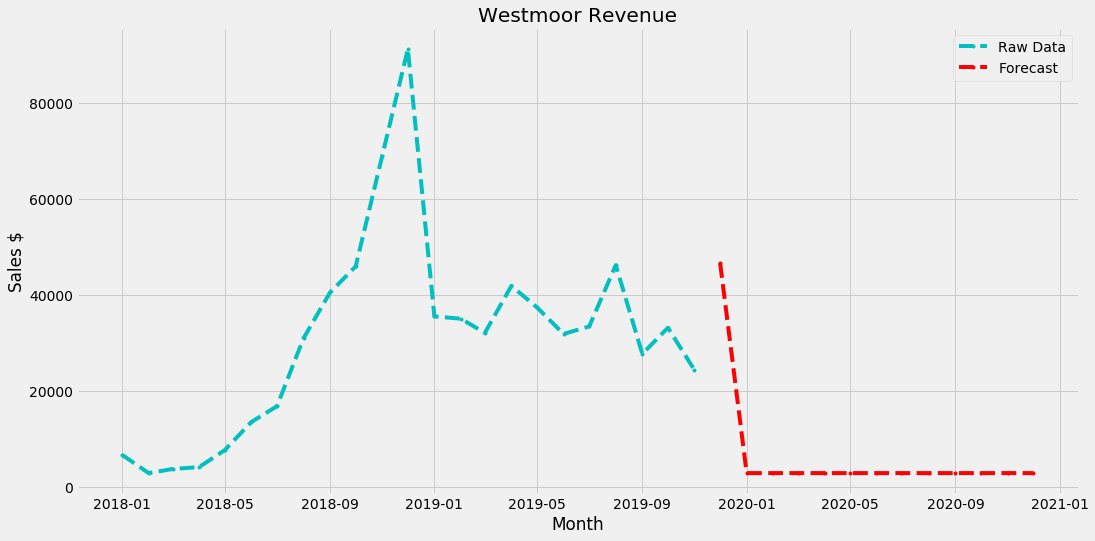

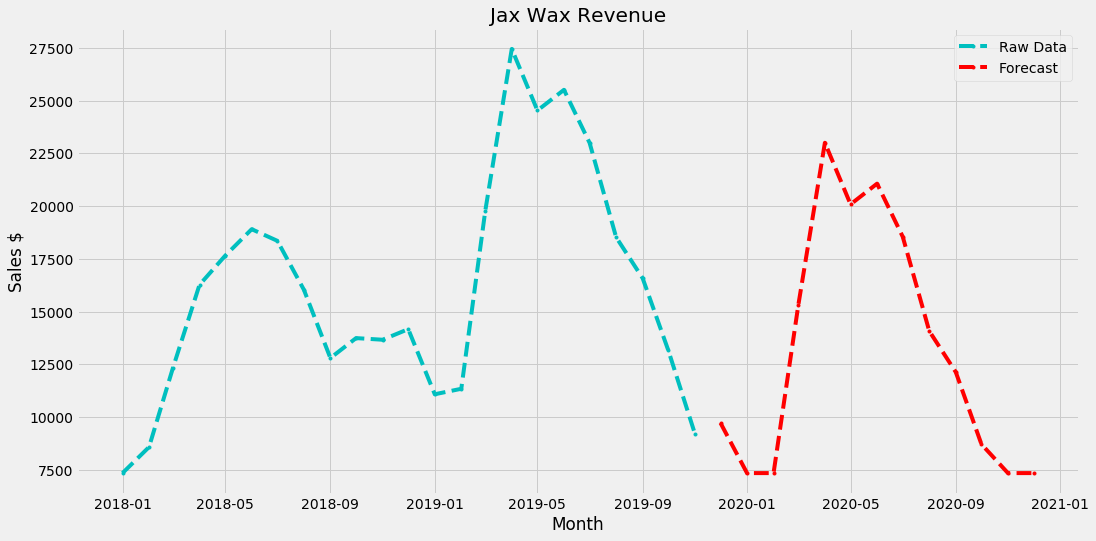

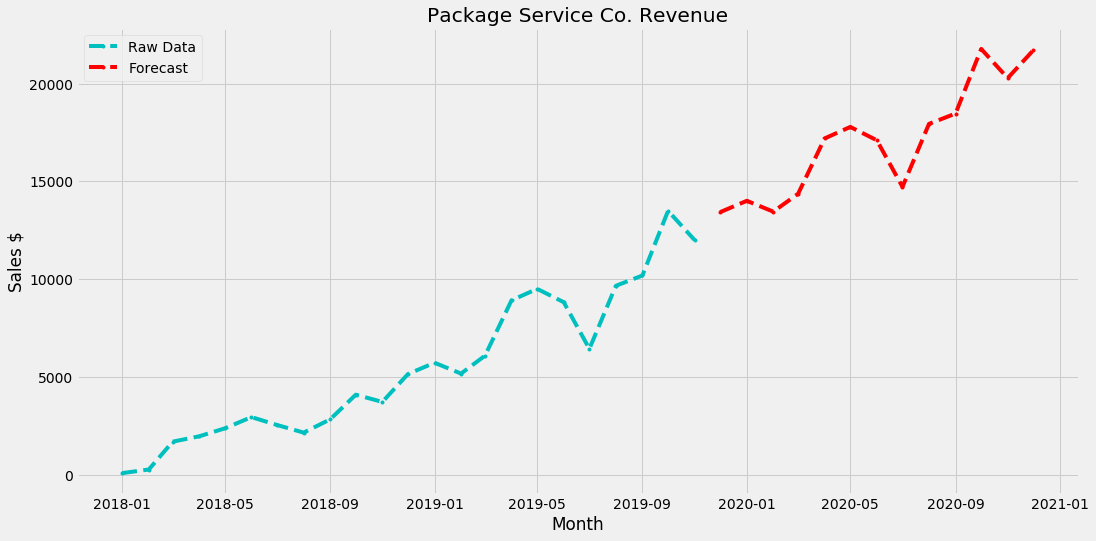

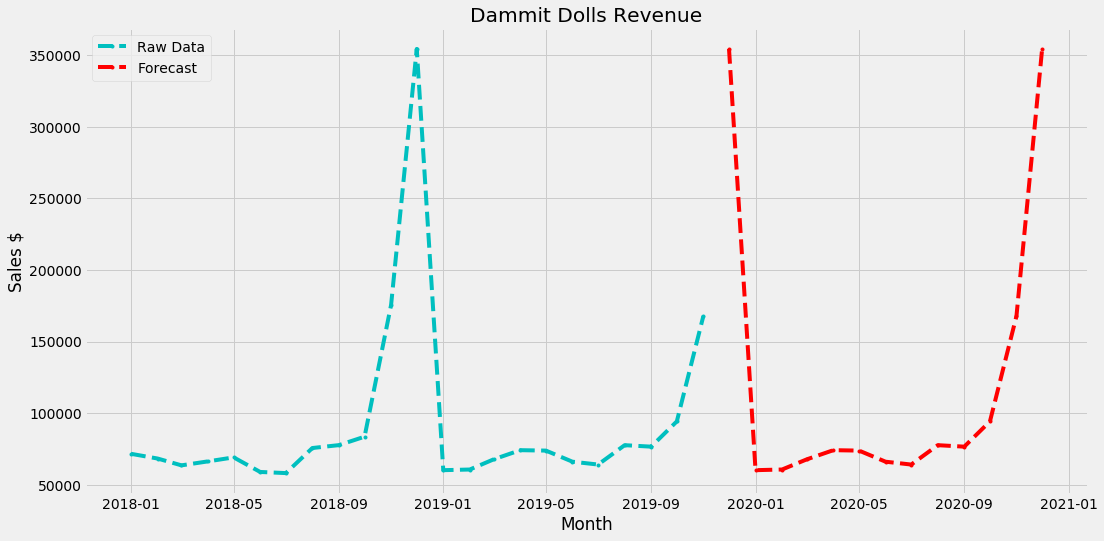

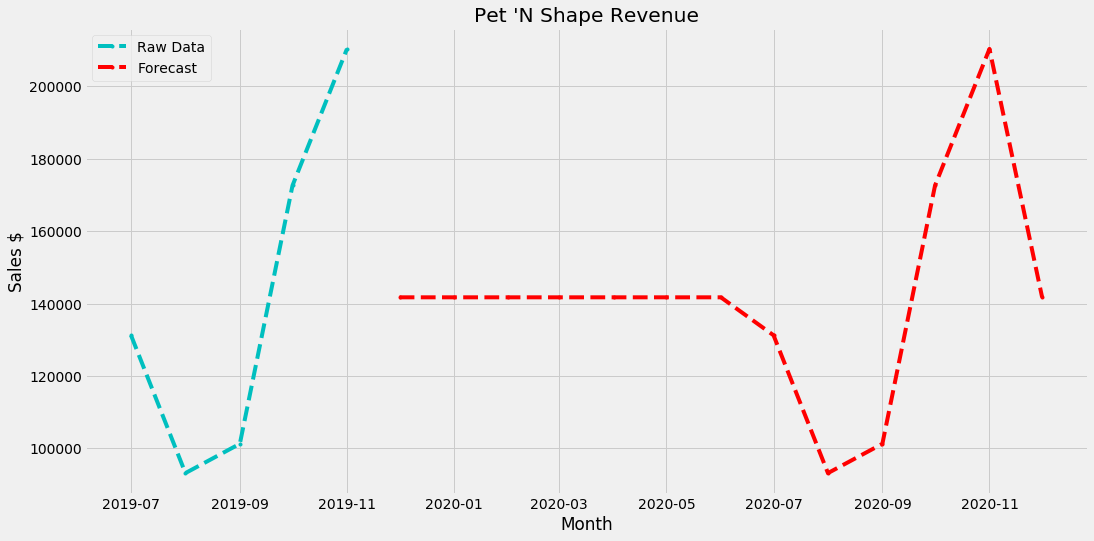

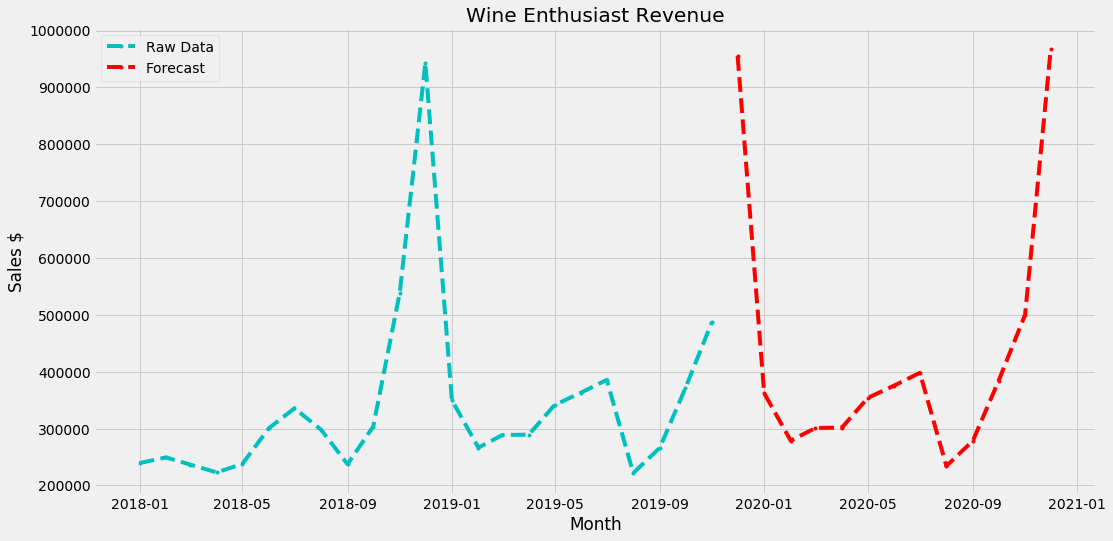

In [7]:
xl2pd=data
for ind in xl2pd.index:
    client=xl2pd.loc[ind, 'Client Name']
    sales=xl2pd.values[ind,1:24]

   
    if str(sales[-1])[0]=='N':
        xl2pd.iloc[ind,24:37]='Needs Data'
        xl2pdlow.iloc[ind,24:37]='Needs Data'
        xl2pdhigh.iloc[ind,24:37]='Needs Data'
    else:

        saleslist=[]
        datelist=[]
        minlist=[]
        count=0
        countzero=0
        for valpd in sales:
            date=datesin[count]
            val=sales[count]
            if str(val)=='0':
                saleslist.append(np.nan)
                datelist.append(date)
                countzero=countzero+1
            elif str(val)[0]!='N':
                minlist.append(float(val))
                saleslist.append(float(val))
                datelist.append(date)

            count=count+1
        newpd=pd.DataFrame({'ds':datelist, 'y':saleslist})
        minsale=np.min(minlist)
        
        if countzero==0:  
            asinrevreg=regressforecast(newpd, 550, countzero)
        else:
            asinrevreg=regressforecast(newpd, 551, countzero)
           
            
        newpd=newpd.set_index('ds')
        
        revmat=asinrevreg.as_matrix(columns=['y'])
        revtransformer = StandardScaler()
        revtransformer.fit(revmat)
        revtran = revtransformer.transform(revmat)

        countmon=0
        for indmon in asinrevreg.index:
            rev=revtran[countmon][0]
            asinrevreg.loc[indmon,'y']=float(rev)
            countmon=countmon+1
        print(asinrevreg)
        aicnum=[]
        param1=[]
        param2=[]
        for param in pdq:
            for param_seasonal in seasonal_pdq:
                try:
                    results = sm.tsa.statespace.SARIMAX(asinrevreg,order=param,seasonal_order=param_seasonal,
                     freq='MS').fit()
                    param1.append(param)
                    param2.append(param_seasonal)
                    aicnum.append(results.aic)
                except:
                    continue
        minpos = aicnum.index(min(aicnum)) 
        ordervarrev=param1[minpos]
        seasonalvarrev=param2[minpos]
   
        resultsrev = sm.tsa.statespace.SARIMAX(asinrevreg, order=ordervarrev,seasonal_order=seasonalvarrev,freq='MS').fit()
        
    

        forecastdatarev=resultsrev.forecast(steps=13, freq='MS')
        forecastdatarev=forecastdatarev.reset_index()
        forecastdatarev=forecastdatarev[-13:]
        revfor=revtransformer.inverse_transform(forecastdatarev.iloc[:,1])


        ct=0
        ylist=[]
        yhighlist=[]
        ylowlist=[]
        for datefor in forecastdatarev.index:
            date=forecastdatarev.loc[datefor, 'index']
            sales=revfor[ct]
            if sales <minsale:
                sales=minsale
            ylist.append(sales)
            salesl=sales*.75
            ylowlist.append(salesl)
            salesu=sales*1.25
            yhighlist.append(salesu)
         
            ct=ct+1
        print(len(ylist))
        xl2pd.iloc[ind,24:37]=ylist
       # xl2pdlow.iloc[ind,24:37]=ylowlist
       # xl2pdhigh.iloc[ind,24:37]=yhighlist
    #    print(xl2pdhigh.iloc[ind,24:37])
       
        fig, axes = plt.subplots(1,1, figsize=(16,8));
        plt.style.use('fivethirtyeight')
        axes.plot(newpd, '--.c');
        axes.plot_date(datesfc,xl2pd.iloc[ind,24:37], '--.r');
     #   axes.plot_date(datesfc,xl2pdlow.iloc[ind,24:37], '--.y');
      #  axes.plot_date(datesfc,xl2pdhigh.iloc[ind,24:37], '--.b');
        axes.set_ylabel('Sales $');
        axes.set_xlabel('Month');
        axes.set_title(client+' Revenue');
        axes.legend(('Raw Data','Forecast', 'Lower Bound Forecast', 'Upper Bound Forecast'))

        fig.savefig('/Users/JoyThompson/Desktop/Forecasting CK Budget/forecastimages/'+client+ '.png')


In [8]:
xl2pdr=rates

In [9]:
def normrate(xl2pddata, xl2pdr, index, clientind):

    datevec=[]
    for salect in range(24,37,1):
        sales=xl2pddata.iloc[clientind,salect]
        flatrate=xl2pdr.loc[index,'Flatrate']

        if isinstance(sales, str):                
            earn=float(flatrate)

        else:

            earn=float(sales*xl2pdr.loc[index,'Rate1'])

            if float(flatrate) > earn:
                earn=float(flatrate)
            elif earn > float(flatrate):
                cap=int(xl2pdr.loc[index,'Tier2'])

                if cap<int(sales):
                    earn=float(sales*xl2pdr.loc[index,'Rate2'])
                    cap2=int(xl2pdr.loc[index,'Tier3'])

                    if  cap2<int(sales):
                        earn=float(sales*xl2pdr.loc[index,'Rate3'])
                        cap3=int(xl2pdr.loc[index,'Tier4'])

                        if cap3<int(sales):
                            earn=float(sales*xl2pdr.loc[index,'Rate4'])
                            cap4=int(xl2pdr.loc[index,'Tier5'])

                            if cap4<int(sales):
                                earn=float(sales*xl2pdr.loc[index,'Rate5'])
        datevec.append(earn)
    print(datevec)  
    return datevec

In [10]:
def yoyrate(xl2pddata, xl2pdr, index, clientind):
    datevec=[]
    base=xl2pdr.loc[index,'Base Rate']
    base=int(base)

    for salesct in range(24,37,1):
        lastcount=salesct-12
        year=xl2pddata.iloc[clientind,salesct]
        lastyear=xl2pddata.iloc[clientind,lastcount]
        if year>lastyear:
            earn=float(float(year-lastyear)*xl2pdr.loc[index,'Rate1']+base)
        else:
            earn=float(base)
        datevec.append(earn)
    datevec[-1]=datevec[0]
    print(datevec)
    return datevec

In [11]:
#Initialize loop to parse through client list and for each client and projected mont and create a four value list to store
#the four projected earnnings.  If the flat rate or earning is greater and if it is store the flatrate value into the list.
#If not determine the rate corresponding to the projected sales value and determine the earnnings corresponding to the rate
#and store this calculation into the four value list
#Initializes dictionary to store each earnnings list with each client
def earnfunc(xl2pddata, xl2pdr):

    monthvec=['Dec 2019', 'Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020',
                 'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020']
    for monthyear in monthvec:
        xl2pddata[monthyear]=''
   
    for clientind in xl2pddata.index:
     
      
        client=xl2pddata.loc[clientind, 'Client Name']
        print(client)
        index=[i for i, x in enumerate(xl2pdr['Client']==client) if x]
        spec=xl2pdr.loc[index,'Minimum']
       
        spec=spec.values[0]
        
        if isinstance(spec, str):
            if spec =='yoy':
                  datevec=yoyrate(xl2pddata,xl2pdr,index, clientind)


            elif spec =='base':
                datevec=[]
                base=xl2pdr.loc[index,'Base Rate']

                for salesct in range(24,37,1):
                    sales=xl2pddata.iloc[clientind,salesct]
                    if isinstance(sales, str):
                        earn=float(base)
                    else:
                        earn=float(sales*xl2pdr.loc[index,'Rate1']+base)
                    datevec.append(earn)
        
        if not isinstance(spec, str):
            if float(spec) == 0:
                datevec=normrate(xl2pddata,xl2pdr, index, clientind)
            else:
                datevec=[]
                for salesct in range(24,37,1):
                    flatrate=float(xl2pdr.loc[index,'Flatrate'])
                    sales=xl2pddata.iloc[clientind,salesct]
                    if isinstance(sales, str):
                        earn=flatrate
                    else:
                        earn=float((sales-spec)*xl2pd2[index,4])
                        if flatrate>earn:
                            earn=flatrate 
                    datevec.append(earn)

        print(datevec)

        countxs=0
        for inddate in datevec:
            month=monthvec[countxs]
            print(month)
            inddate=float(inddate)
            print(inddate)
            xl2pddata.loc[clientind,month]=inddate
            countxs=countxs+1
        #Insert earnnings list into the dictionary for the client
        #Determine the sum of the four months projected earnnings and store the value directly into the current sale's dataframe
            
    return xl2pddata

In [12]:
xl2pd=earnfunc(xl2pd, xl2pdr)
xl2pdlow=earnfunc(xl2pdlow,xl2pdr)
xl2pdhigh=earnfunc(xl2pdhigh,xl2pdr)


3B Medical
[26110.612500080933, 33893.016000080934, 15229.506500080934, 16891.58550008093, 22914.351000080933, 31240.624500080932, 31166.251000150965, 34168.571500080936, 29342.80600008094, 29742.997500080935, 35448.13300008093, 40631.58750008093, 40924.254500161864]
[26110.612500080933, 33893.016000080934, 15229.506500080934, 16891.58550008093, 22914.351000080933, 31240.624500080932, 31166.251000150965, 34168.571500080936, 29342.80600008094, 29742.997500080935, 35448.13300008093, 40631.58750008093, 40924.254500161864]
Dec 2019
26110.612500080933
Jan 2020
33893.016000080934
Feb 2020
15229.506500080934
Mar 2020
16891.58550008093
Apr 2020
22914.351000080933
May 2020
31240.624500080932
Jun 2020
31166.251000150965
Jul 2020
34168.571500080936
Aug 2020
29342.80600008094
Sep 2020
29742.997500080935
Oct 2020
35448.13300008093
Nov 2020
40631.58750008093
Dec 2020
40924.254500161864
David's Wholesale
[28151.817673801444, 25601.163274240327, 25979.637173801442, 27908.111973801446, 28598.8754738014

NameError: name 'xl2pdlow' is not defined

In [ ]:
print(xl2pd)


In [13]:
#Create destination excel file lovation
fileforecast = '/Users/JoyThompson/Desktop/Forecasting CK Budget/CK_SalesData_JoyForecastspecial2.xlsx'
#Write the current sale's dataframe to a new excel file as designated by the above destination
writer = pd.ExcelWriter(fileforecast, engine='xlsxwriter')
xl2pd.to_excel(writer, sheet_name='Budget Forecast')

writer.save()